# Source of inspiration

Many sources about that, pointing all to https://course.fast.ai/

This is version 5 of this course.

# Lesson 1 - Getting started

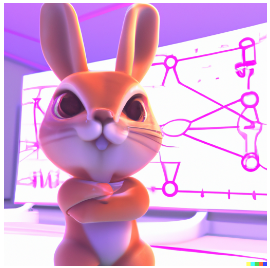

> In this lesson you’re going to hit the ground running – in the first five minutes you’ll see a complete end to end example of training and using a model that’s so advanced it was considered at the cutting edge of research capabilities in 2015.  
So, let’s get started!

https://course.fast.ai/Lessons/lesson1.html

## Deep learning introduction

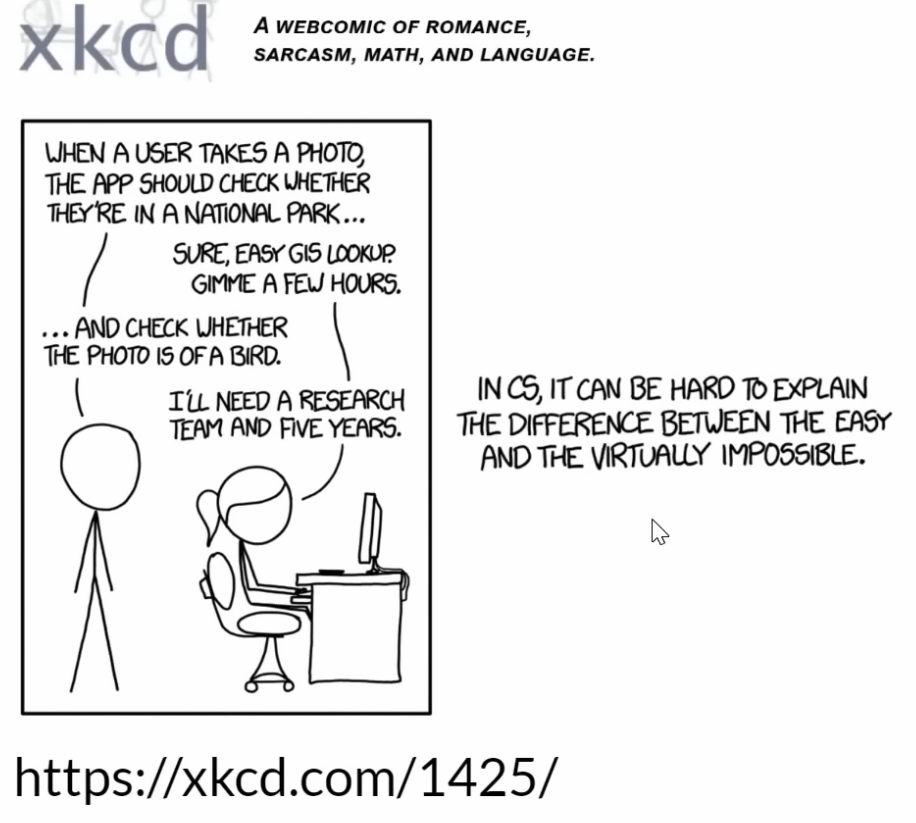

In 2015, nearly impossible to recognize a bird with CS. And Jeremy doing that in 2 minutes ;)

## Recent progress

After this brief demonstration, Jeremy shared what he remmbers about recent progress in AI such as:

- artworks: Dall-e, midjourney to create images from text

- explaining jokes: Google Pathways Language Model (PaLM) to explain jokes or run mathematical proof

## Self learning of features

Then classical but nice explanation that NN learns features (features are not given or coded) and illustrates that with Matt Zeiler and Rob Fergus works

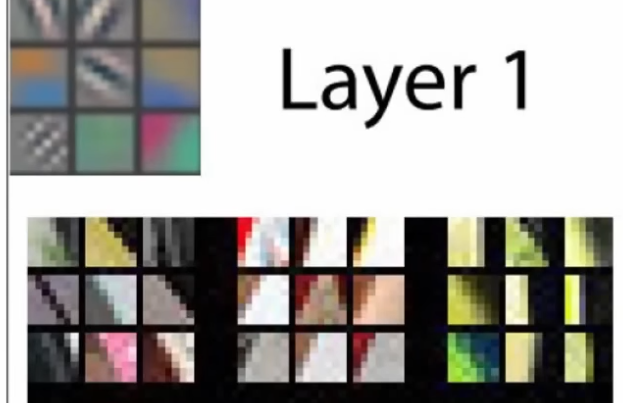

## Vision can be used in many different ways

And it is of course used to classify images, but all these techniques can be combined out of this field for example:

- recognize sound by transforming sound waves into pictures ([Ethan Sutin](https://forums.fast.ai/t/share-your-work-here/27676/40))

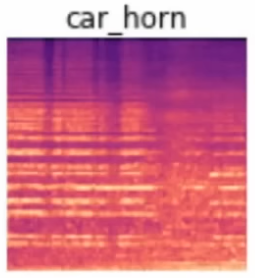

- turn timeseries into pictures ([Ignacio Oguiza](https://forums.fast.ai/t/time-series-sequential-data-study-group/29686))

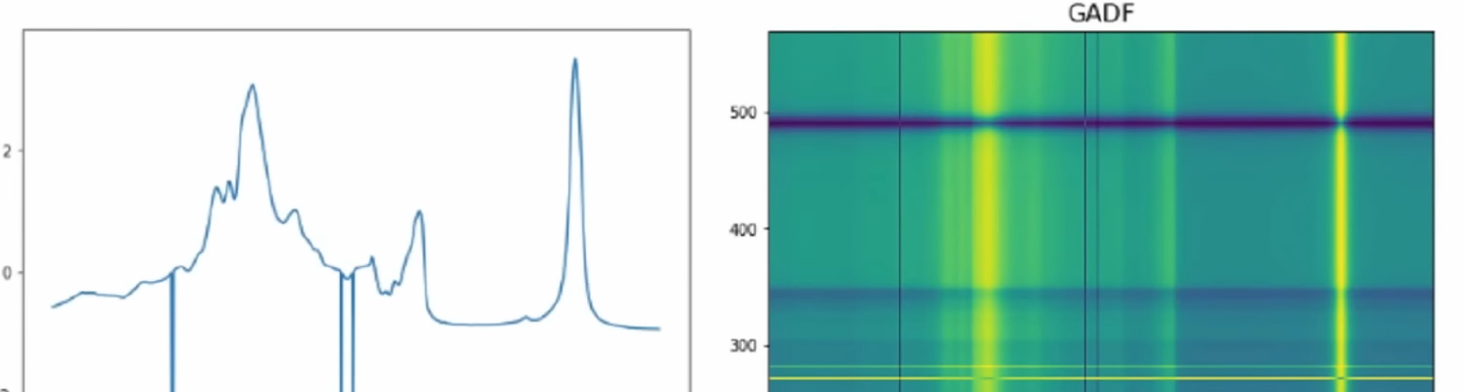


- pictures from mouse movements ([Gleb Esman](https://forums.fast.ai/t/new-blog-post-user-classification-by-mouse-movements/2595))

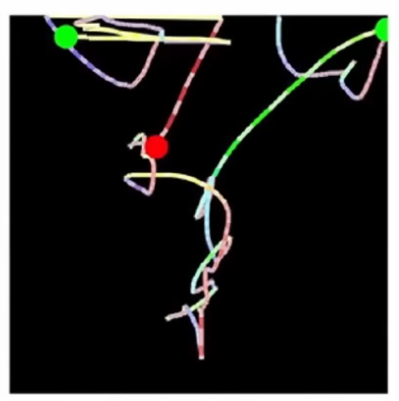

## Tools - pytorch, jupyter notebooks, kaggle

For this course Jeremy suggests to use the kaggle cloud server.

If using someone else notebook, just upvote and click `Copy & Edit`

https://www.kaggle.com/code/guillaumeramelet/jupyter-notebook-101/edit



And now some hands-on starting with `Is it a bird?` [notebook](https://www.kaggle.com/code/guillaumeramelet/is-it-a-bird-creating-a-model-from-your-own-data/edit).

And aside note: Jeremy is running all the presentation through Jupyter notebook and [RISE](https://rise.readthedocs.io/en/stable/)


It's a good idea to ensure you're running the latest version of any libraries you need.

`!pip install -Uqq libraries` upgrades to the latest version of libraries (fastai for example)



## Going through this "is it a bird?" notebook

Jeremy shares best practices and steps

Such as viewing your data between each steps

Jeremy uses a lot of functional programming it is why we see things like [map](https://www.geeksforgeeks.org/python-map-function/) used a lot.

### DataBlock

Using Datablocks API

> To train a model, we'll need DataLoaders, which is an object that contains a training set (the images used to create a model) and a validation set (the images used to check the accuracy of a model -- not used during training). In fastai we can create that easily using a DataBlock, and view sample images from it:

And Jeremy explains the logic between the 5 arguments needed to create a DataBlock:

* blocks: tupple with type of inputs and output

* get_items: to get all data, here it points to a function to get list of image fileS

* splitter: method to split between training set and validation set

* get_y: to kown labels, here it is a function

* item_tfms: which transformation to apply

And from a DataBlock you create dataloaders (dls) provding (path for images; and bs (batch size))

### learners

This is a key part.

Learners are taking 3 arguments: dataloaders, model, metric

And vision models can be from [timm](https://timm.fast.ai/). 

Here we train a pre-trained model, which is called fine_tune and we do it on 3 epochs.

### predict

Just providing an item to `lean.predict` will return `label`, `tensor value`, `probability`

And it is why we have such outputs

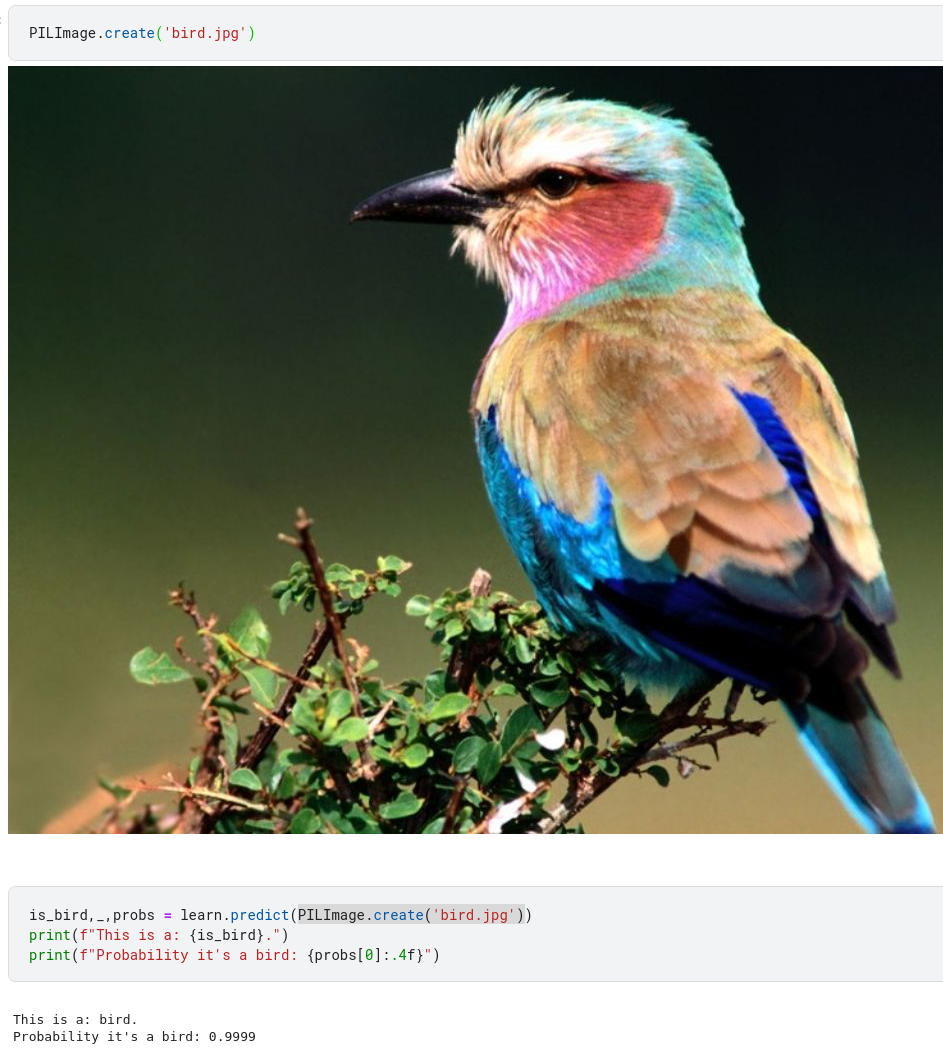

## and beyond image recognition

### Segmentation

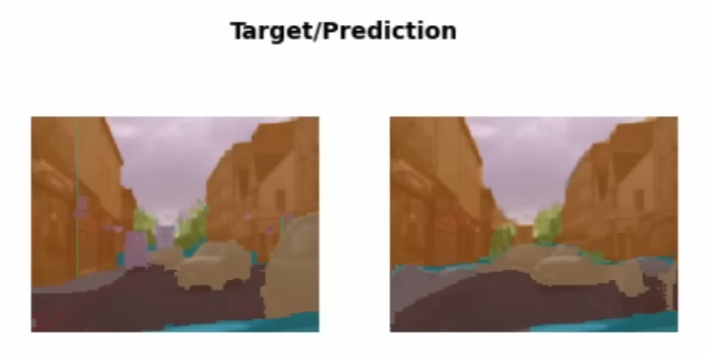

And here we don't have datablock but direclty dataloaders

### Tabular analysis

Here again no need for DataBlock but a direct use of `TabularDataLoaders`

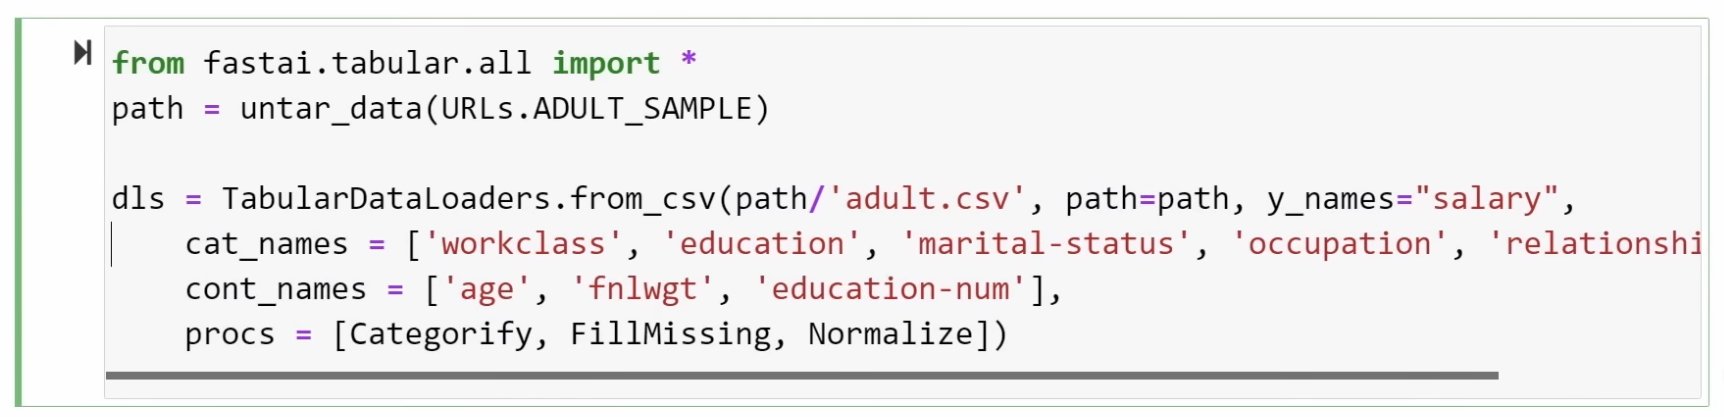

And the `tabular_learner` wich takes dls and metric.

### Collaborative filtering (recommandation system)

# Lesson 2 - Deployment

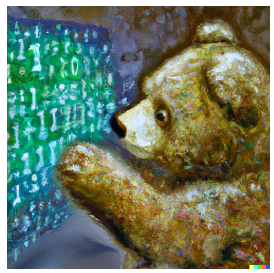

> Today you’ll be designing your own machine learning project, creating your own dataset, training a model using your data, and finally deploying an application on the web. We’ll be using a particular deployment target called [Hugging Face Space](https://huggingface.co/spaces) with [Gradio](https://gradio.app/), and will also see how to use JavaScript to implement an interface in the browser. Deploying to other services will look very similar to the approach you’ll study in this lesson.

https://course.fast.ai/Lessons/lesson2.html

In this lesson we will use gradio + huggingface spaces.

Jeremy starts by training a vision classifier and use this 1st model to clean labels using `ImageClassifierCleaner` 


This is not specific to vision.

## Gradio + HuggingFace Spaces

### create HF repo

Create this [minima](https://huggingface.co/spaces/Guillaume63/minima) space from HF.

Aside the explanation on HF, Jeremy shares how useful [Github Desktop](https://github.com/shiftkey/desktop/releases) is.

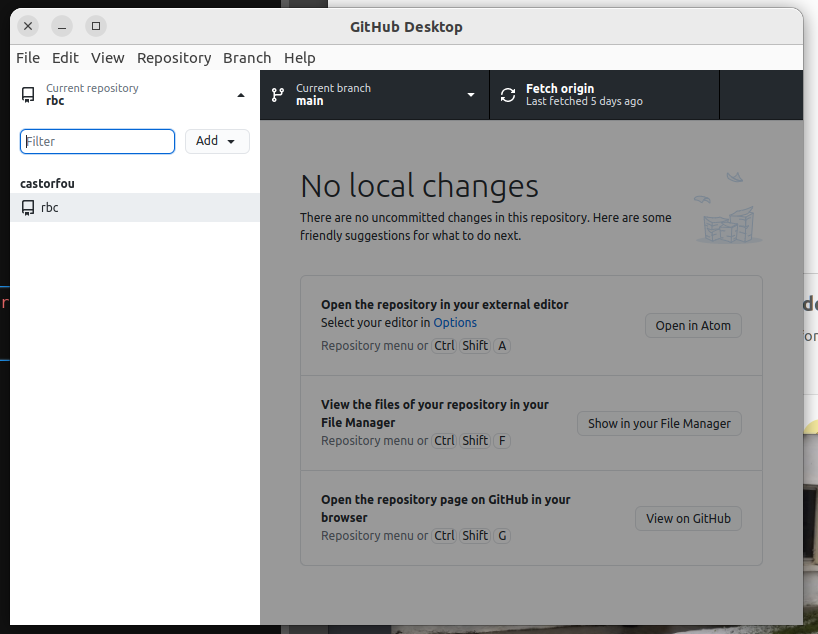

### create 1st gradio app and host it

Create app.py as instructed in our freshly created HF space. Commit Push (using github desktop). Back to HF interface, something is being built. and voila

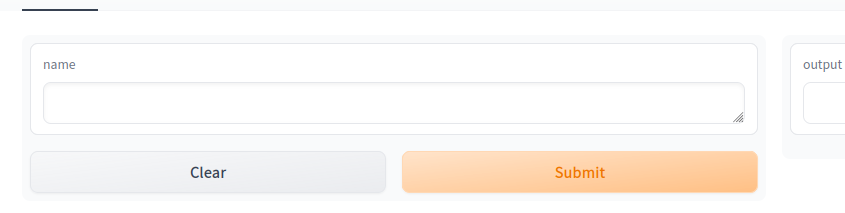

Nothing new because I played with [gradio and HF](/posts/2022-10-12-gradio_huggingface.html) couple of weeks ago.

We know have a basic app hosted. We can just integrate a deep learning model.

### train and export a DL model

And for that Jeremy has setup [something on kaggle](https://www.kaggle.com/code/guillaumeramelet/saving-a-basic-fastai-model/edit)

They key (and new) part here is

```python
learn.export('model.pkl')
```

Finally, open the Kaggle sidebar on the right if it's not already, and find the section marked "Output". Open the /kaggle/working folder, and you'll see model.pkl. Click on it, then click on the menu on the right that appears, and choose "Download". After a few seconds, your model will be downloaded to your computer, where you can then create your app that uses the model.

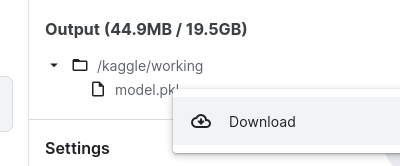

And copy/past it to your local minima repo. Push it to HF.

### integrate it with gradio

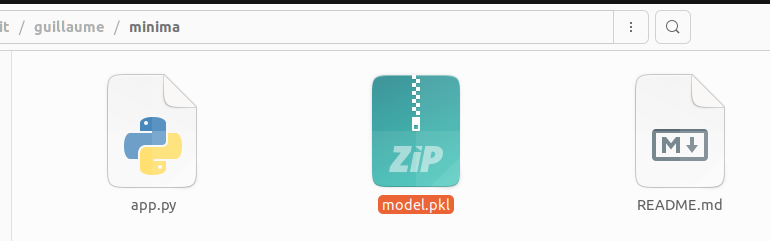

And Jeremy illustrates how to do it with a notebook and nbdev. Exactly as I did in [gradio and huggingface - handson](/posts/2022-10-12-gradio_huggingface.html)

#### load model

Main parts are to load the model with 

```python
learn = load_learner('model.pkl')
```

#### run prediction
to run a prediction with

```python
pred, idx, probs = learn.predict(img)
```

#### call prediction through a function
and to create the `classify_image` function as expected by gradio

```python
categories = ('Dog', 'Cat')

def classify_image(img):
    pred, idx, probs = learn.predict(img)
    return dict(zip(categories, map(float, probs))))
```

and this return part is quite complex because gradio cannot deal with Tensors.


#### create gradio UI
There is now the gradio interface that takes image and returns dictionary.

```python
image = gr.inputs.Image(shape=(192, 192))
label = gr.outputs.Label()
examples = ['dog.jpg', 'cat.jpg', 'dunno.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)
```

#### export as app.py

And export as app.py and for that Jeremy uses a slightly different version that I used

Mine;
```python
import nbdev; nbdev.export.nb_export('app.ipynb', lib_path='.')
```

His:
```python
from nbdev.export import notebook2script
notebook2script('app.ipynb')
```

https://huggingface.co/spaces/jph00/testing

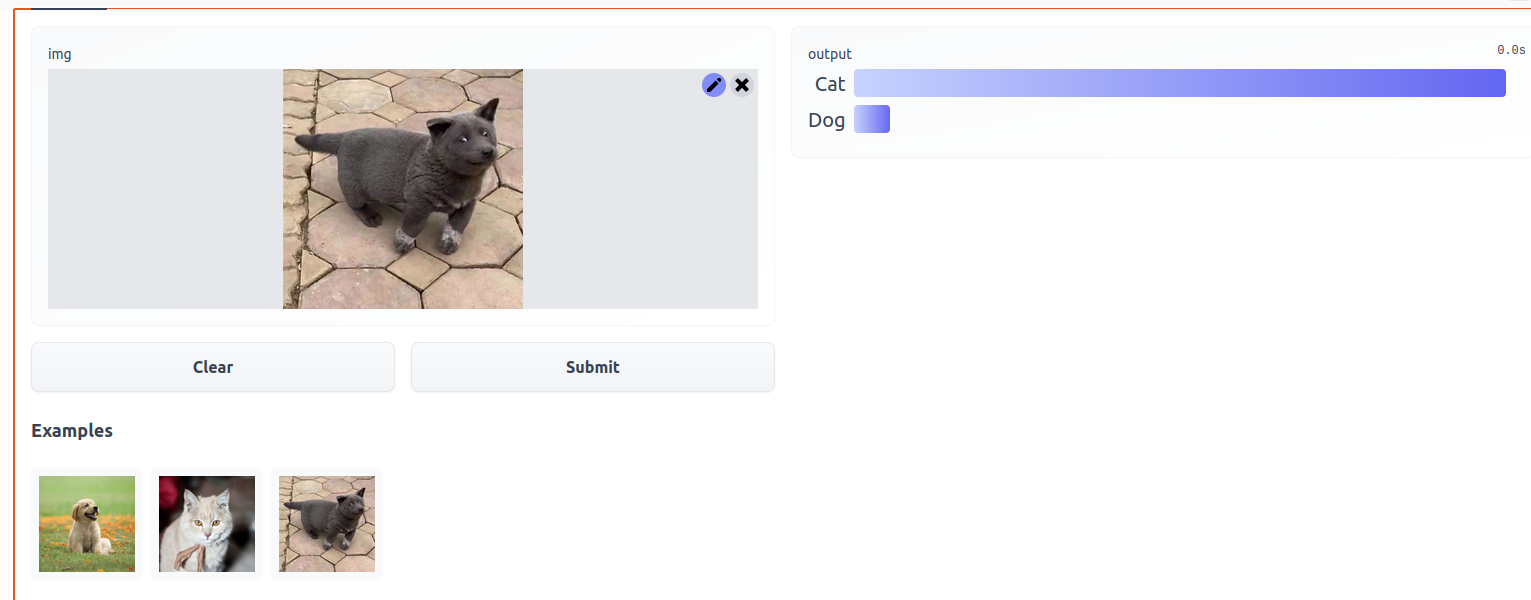

## fastsetup

https://github.com/fastai/fastsetup

clone it with github desktop (will do cmd line I don't have the option Jeremy has)

**install conda mamba** (if needed)

```bash
./setup-conda.sh
```

**install fastai from scratch**

```bash
conda create -n fastai python=3.9
conda activate fastai
conda install -c fastchan fastai nbdev
pip install gradio
```

**update to up-to-date versions**

```bash
conda activate fastai
conda update -c fastchan fastai nbdev
pip install -U gradio
```


## API

### gradio, streamlit

2 options within HF to build app: 

- [gradio](https://gradio.app/docs/). Lot of widgets, reasonably flexible to allow prototyping. 
- [streamlit](https://streamlit.io/). More flexible. Not so easy to start with.


### gradio, hf API
and with gradio + HF you have automatically an API available
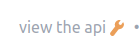

By [clicking it](https://hf.space/embed/jph00/testing/api) you get the documentation of this API.

It can then be used by any JS interface you would like to develop.

And HF is nice enought to provide examples (live demo) in Python, curl (command line) and javascript



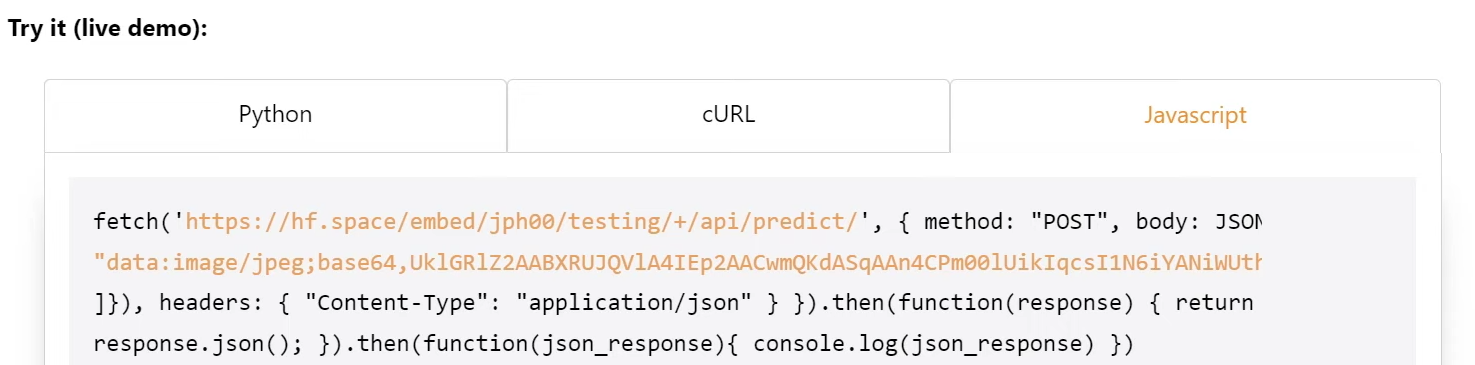

### example from js

Jeremy uses this to develop a small JS interface in https://fastai.github.io/tinypets/1single.html

And the code is quite minimum: https://github.com/fastai/tinypets/blob/master/1single.html

```html
---
title: 1. Single file
layout: page
---

<input id="photo" type="file">
<div id="results"></div>
<script>
  async function loaded(reader) {
    const response = await fetch('https://hf.space/embed/jph00/pets/+/api/predict/', {
      method: "POST", body: JSON.stringify({ "data": [reader.result] }),
      headers: { "Content-Type": "application/json" }
    });
    const json = await response.json();
    const label = json['data'][0]['confidences'][0]['label'];
    results.innerHTML = `<br/><img src="${reader.result}" width="300"> <p>${label}</p>`
  }
  function read() {
    const reader = new FileReader();
    reader.addEventListener('load', () => loaded(reader))
    reader.readAsDataURL(photo.files[0]);
  }
  photo.addEventListener('input', read);
</script>
```

## GH pages

It can run locally of course, and can be hosted with gh pages.

### by generating from fastpages

Jeremy suggests to use [fastpages](https://github.com/fastai/fastpages). In the doc at the bottom there is a link to generate a website from fastapages

[fastai/fastpages: An easy to use blogging platform, with enhanced support for Jupyter Notebooks.](https://github.com/fastai/fastpages)

> Setup Instructions
> 
> 1.  Generate a copy of this repo by clicking [on this link](https://github.com/fastai/fastpages/generate). Make sure to sign in to your account, or you will see a 404 error. Name your repo anything you like **except** {your-username}.github.io.

Apply a theme (to be setup in `_config.yml`)

Create an `index.md` file which is the landing page.

### or by forking an existing one (e.g. [tinypets](https://github.com/fastai/tinypets))

and in that case we have to turn on gh pages

Settings > Pages > Enable gh pages (select branch and save)

We can now switch to different theme. 

From `remote_theme: daviddarnes/alembic@main` to `remote_theme: pages-themes/hacker`

it provides a complete different look

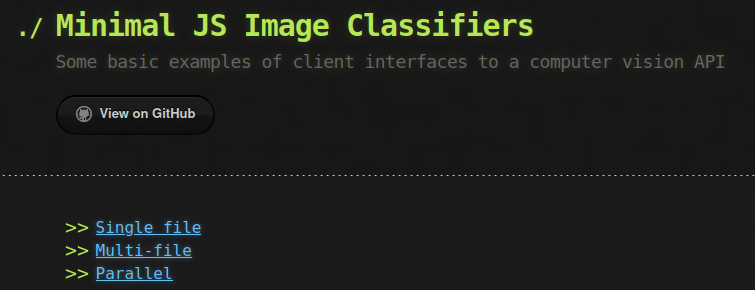

Looks like we can browse through these jekyll themes at http://jekyllthemes.org/

# Lesson 3 - Neural net foundations

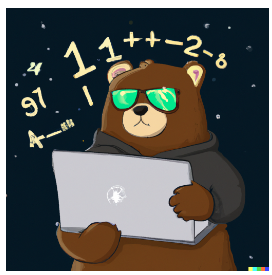

> Today we’ll be learning about the mathematical foundations of deep learning: Stochastic gradient descent (SGD), and the flexibility of linear functions layered with non-linear activation functions. We’ll be focussing particularly on a popular combination called the Rectified linear function (ReLU).

https://course.fast.ai/Lessons/lesson3.html

Jeremy mentions [Lesson Zero](https://www.youtube.com/watch?v=gGxe2mN3kAg) which is more about the way he teaches to learn these things. and recommened process to be run by students.

On this lesson, Jeremy uses [paperspace gradient](https://www.paperspace.com/gradient). Which offers full machine with jupyter environments.

## timm

To use it we have to install it: `pip install timm`

Jeremy illsutrates how to switch model architecture. And for that uses timm fastai. He has created a notebook on kaggle to rank vision models https://www.kaggle.com/code/jhoward/which-image-models-are-best/

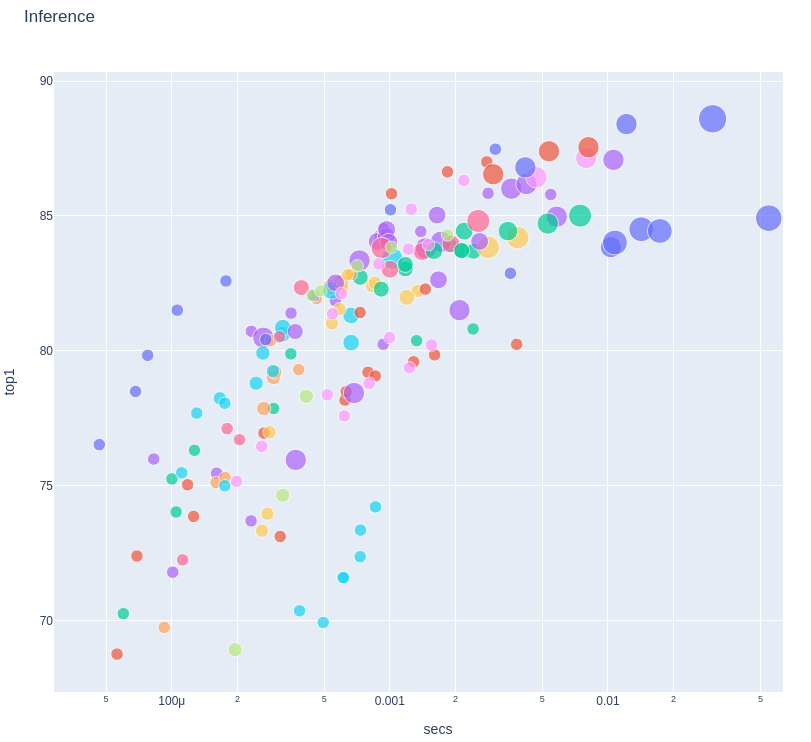

Convnext models seem to be a good fit.

In [2]:
import timm

timm.list_models('convnext*')

['convnext_atto',
 'convnext_atto_ols',
 'convnext_base',
 'convnext_base_384_in22ft1k',
 'convnext_base_in22ft1k',
 'convnext_base_in22k',
 'convnext_femto',
 'convnext_femto_ols',
 'convnext_large',
 'convnext_large_384_in22ft1k',
 'convnext_large_in22ft1k',
 'convnext_large_in22k',
 'convnext_nano',
 'convnext_nano_ols',
 'convnext_pico',
 'convnext_pico_ols',
 'convnext_small',
 'convnext_small_384_in22ft1k',
 'convnext_small_in22ft1k',
 'convnext_small_in22k',
 'convnext_tiny',
 'convnext_tiny_384_in22ft1k',
 'convnext_tiny_hnf',
 'convnext_tiny_in22ft1k',
 'convnext_tiny_in22k',
 'convnext_xlarge_384_in22ft1k',
 'convnext_xlarge_in22ft1k',
 'convnext_xlarge_in22k']

And to use one it is just a matter of calling

```python
learn = vision_learner(dls, 'convnext_tiny_in22k', metrics=error_rate).to_fp16()
```

## Using in an app

When dealing with categories, fastai keep category names in the dataloader under vocab

```python
categories = learn.dls.vocab

def classify_image(img):
    pred, idx, probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))
```

## Applying this on my own app: [cheeses](https://huggingface.co/spaces/Guillaume63/cheeses)

All notebooks from these courses are at https://github.com/fastai/course22

And my app is at https://huggingface.co/spaces/Guillaume63/cheeses

I had to configure this repo to use git-lfs to store large binary files:

```bash
git lfs install
#if needed reset the last commit
git reset --soft HEAD^
git status
#if offeneded files ar already staged, restore them
git restore --staged *.jpg
git status
#add them back
git add -A
#check they are managed by git lfs
git lfs ls-files
git commit -am'recommit after lfs install'
git push
```

and I pushed it to [fastai forum](https://forums.fast.ai/t/share-your-work-here/96015/515?u=guillaumeramelet)

## Inside NN

https://www.kaggle.com/code/jhoward/how-does-a-neural-net-really-work

Illustration of a powerfull python function `partial`

In [16]:
from functools import partial
def mk_quad(a, b, c): return partial(quad, a, b, c)

In [17]:
f = mk_quad(3,2,1)
f(1.5)

10.75

I think I will reuse that!

Jeremy explains NN in 3 steps:

- loss caculation (with nice simulator to manually approach better paameters)
- grad calculation, adjustment (with learning rate) and loop
- we can use combination of relu to be as close as possible to any function (whatever the dimension)

## Using Microsoft excel

This is fun. Not as surpising as the one from 3-4 years ago but Jeremy is very good at explaining it. Excel spreadsheet is [here](https://github.com/fastai/course22/blob/master/xl/titanic.xlsx).
 

## Next lesson

Will practice nlp using huggingface api.

# Lesson 4 - Natural Language (NLP)

https://course.fast.ai/Lessons/lesson4.html

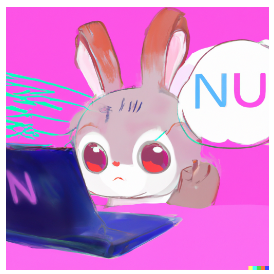

> It’s time for us to learn how to analyse natural language documents, using Natural Language Processing (NLP). We’ll be focusing on the [Hugging Face](https://huggingface.co/) ecosystem, especially the [Transformers](https://huggingface.co/docs/transformers/index) library, and the vast collection of pretrained [NLP models](https://huggingface.co/models). Our project today will be to classify that similarity of phrases used to describe [US patents](https://www.kaggle.com/competitions/us-patent-phrase-to-phrase-matching). A similar approach can be applied to a wide variety of practical issues, in fields as wide-reaching as marketing, logistics, and medicine.

Jeremy is using this notebook [Getting started with NLP for absolute beginners](https://www.kaggle.com/code/jhoward/getting-started-with-nlp-for-absolute-beginners) on kaggle. As usually upvote & copy/[edit](https://www.kaggle.com/code/guillaumeramelet/getting-started-with-nlp-for-absolute-beginners/edit) to start using it.

Didn't know that pandas author Wes McKinney has released (free) a [book Python for Data Analysis](https://wesmckinney.com/book/) explaining how to use it brillantly.

At the time of the training (May/2022), HuggingFace had 44k models. Today (November/2022) it has 86k models. Huge!

We use dataset library from HF.

Jeremy explains then validation set. And points to some article from Rachel Thomas explaining [how to create a good one](https://www.fast.ai/posts/2017-11-13-validation-sets.html).

And another one from Rachel Thomas explaining how tricky can be proxy metrics: [The problem with metrics is a big problem for AI](https://www.fast.ai/posts/2019-09-24-metrics.html)

# Lesson 5 - From-scratch model

https://course.fast.ai/Lessons/lesson5.html

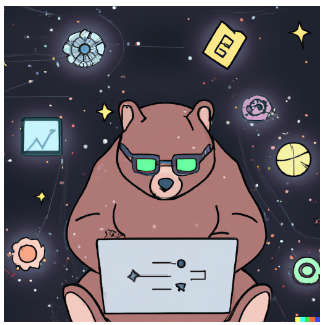

> Today we look at how to create a neural network from scratch using Python and PyTorch, and how to implement a training loop for optimising the weights of a model. We build up from a single layer regression model up to a neural net with one hidden layer, and then to a deep learning model. Along the way we’ll also look at how we can use a special function called sigmoid to make binary classification models easier to train, and we’ll also learn about metrics.